**Importing Libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**Loading Data**

In [2]:
#training data
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,Educational-num,Marital-status,occupation,relationship,race,gender,gain,loss,hours,Native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,State-gov,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,State-gov,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,State-gov,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,State-gov,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#testing data
dataTest = pd.read_csv("/adultTest.csv")
dataTest['income'] = dataTest['income'].str.strip('.') 
dataTest.head()

,age,workclass,fnlwgt,education,Educational-num,Marital-status,occupation,relationship,race,gender,gain,loss,hours,Native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#number of records before removing unknown data

#training data
total_record_train = data.shape[0]
nGreater50 = data[data['income'] == '>50K'].shape[0]
nless50 = data[data['income'] == '<=50K'].shape[0]
greaterPercentage = (nGreater50 / total_record_train)*100

print("Total recored in training data : ",total_record_train)
print("Number of people making more than $50K : ",nGreater50)
print("Number of people less than $50K : ",nless50)
print("Percentage of people making more than $50K : ",greaterPercentage)

#testing data
total_record_test = dataTest.shape[0]
nGreater50T = dataTest[dataTest['income'] == '>50K'].shape[0]
nless50T = dataTest[dataTest['income'] == '<=50K'].shape[0]
greaterPercentageT = (nGreater50T / total_record_test)*100

print("\nTotal recored in testing data : ",total_record_test)
print("Number of people making more than $50K : ",nGreater50T)
print("Number of people less than $50K : ",nless50T)
print("Percentage of people making more than $50K : ",greaterPercentageT)

Total recored in training data :  32561
Number of people making more than $50K :  7841
Number of people less than $50K :  24720
Percentage of people making more than $50K :  24.080955744602438

Total recored in testing data :  16281
Number of people making more than $50K :  3846
Number of people less than $50K :  12435
Percentage of people making more than $50K :  23.622627602727107


**Comparing Data**

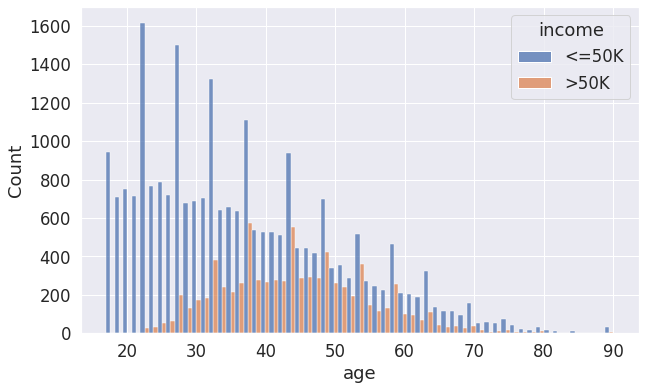

In [5]:
#age wise
sns.set(rc = {'figure.figsize': (10, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['age'], hue = data['income'], multiple = 'dodge')

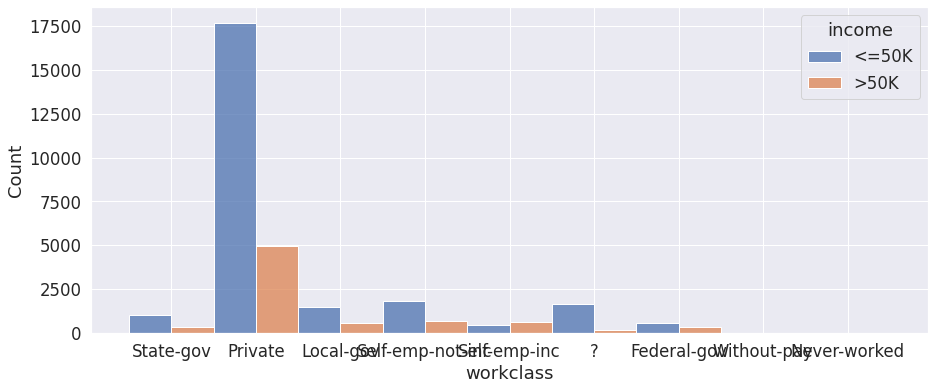

In [6]:
#workclass wise
sns.set(rc = {'figure.figsize': (15, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['workclass'], hue = data['income'], multiple = 'dodge')

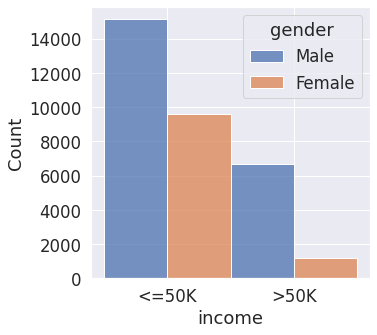

In [32]:
#gender wise
sns.set(rc = {'figure.figsize': (5, 5)}, font_scale = 1.5)
sns.histplot(data, x = data['income'], hue = data['gender'], multiple = 'dodge')

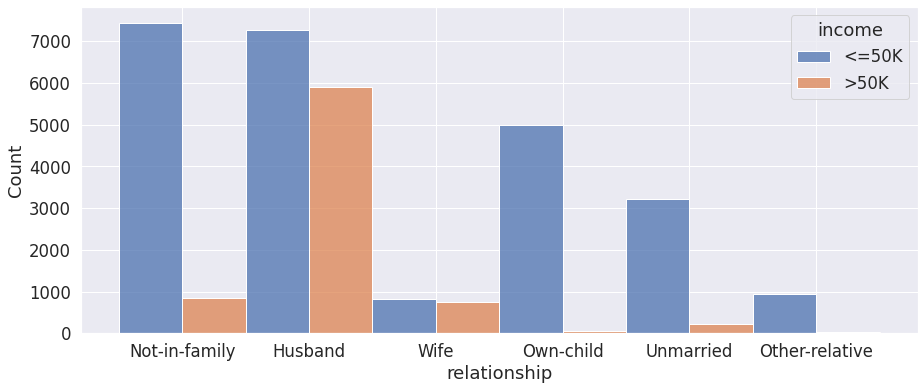

In [8]:
#relationship wise
sns.set(rc = {'figure.figsize': (15, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['relationship'], hue = data['income'], multiple = 'dodge')

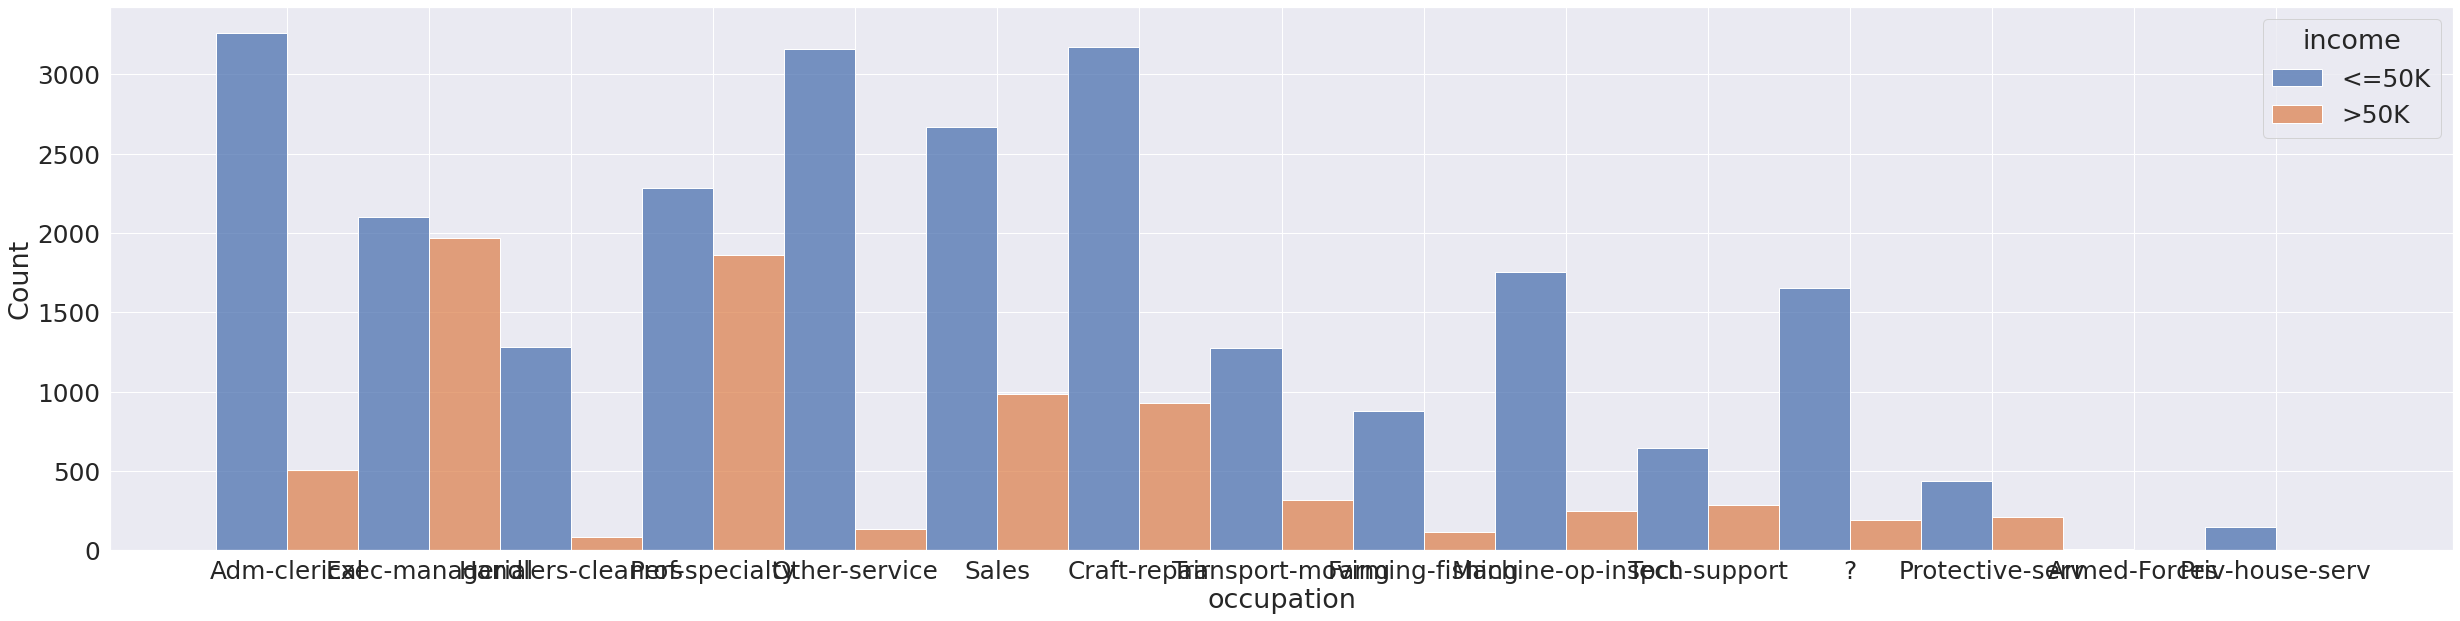

In [9]:
#occupation wise
sns.set(rc = {'figure.figsize': (42, 10)}, font_scale = 2.25)
sns.histplot(data, x = data['occupation'], hue = data['income'], multiple = 'dodge')

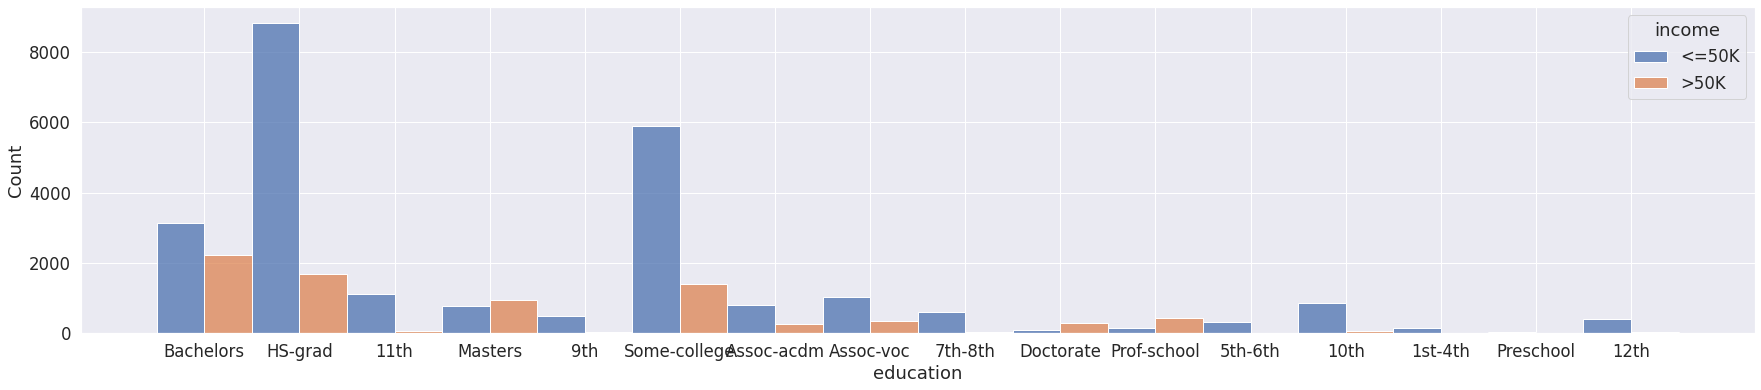

In [10]:
#education wise
sns.set(rc = {'figure.figsize': (30, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['education'], hue = data['income'], multiple = 'dodge')

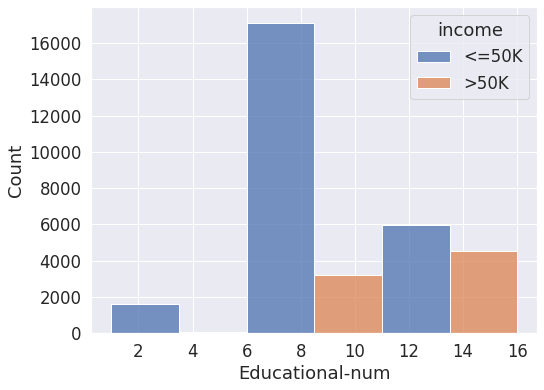

In [11]:
#Educational-num wise
sns.set(rc = {'figure.figsize': (8, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['Educational-num'], hue = data['income'], multiple = 'dodge',binwidth=5)

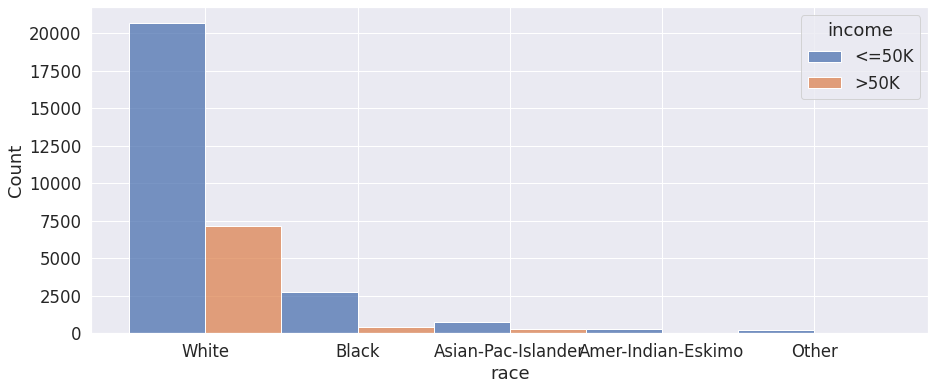

In [12]:
#race wise
sns.set(rc = {'figure.figsize': (15, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['race'], hue = data['income'], multiple = 'dodge')

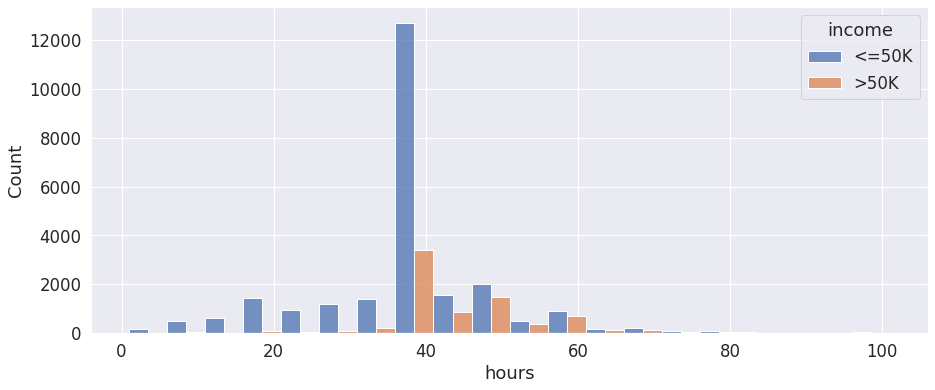

In [13]:
#hours-per-week wise
sns.set(rc = {'figure.figsize': (15, 6)}, font_scale = 1.5)
sns.histplot(data, x = data['hours'], hue = data['income'], multiple = 'dodge', binwidth=5)

**Remove unknown data**

In [6]:
#drop rows which contains unknown data

def removeUnknown(data,total_record):
  dropValue = []
  for i in range(0,total_record):
    temp = list(data.iloc[i])
    empty = temp.count('?')
    if empty > 0:
      dropValue.append(i)
  return data.drop(labels=dropValue, axis=0)


dataTrain = removeUnknown(data,data.shape[0])
dataTest = removeUnknown(dataTest,dataTest.shape[0])

In [7]:
#number of records after removing unknown data

#training data
total_record_train = dataTrain.shape[0]
nGreater50 = dataTrain[dataTrain['income'] == '>50K'].shape[0]
nless50 = dataTrain[dataTrain['income'] == '<=50K'].shape[0]
greaterPercentage = (nGreater50 / total_record_train)*100

print("Total recored in training data : ",total_record_train)
print("Number of people making more than $50K : ",nGreater50)
print("Number of people less than $50K : ",nless50)
print("Percentage of people making more than $50K : ",greaterPercentage)

#testing data
total_record_test = dataTest.shape[0]
nGreater50T = dataTest[dataTest['income'] == '>50K'].shape[0]
nless50T = dataTest[dataTest['income'] == '<=50K'].shape[0]
greaterPercentageT = (nGreater50T / total_record_test)*100

print("\nTotal recored in testing data : ",total_record_test)
print("Number of people making more than $50K : ",nGreater50T)
print("Number of people less than $50K : ",nless50T)
print("Percentage of people making more than $50K : ",greaterPercentageT)

Total recored in training data :  30162
Number of people making more than $50K :  7508
Number of people less than $50K :  22654
Percentage of people making more than $50K :  24.892248524633644

Total recored in testing data :  15060
Number of people making more than $50K :  3700
Number of people less than $50K :  11360
Percentage of people making more than $50K :  24.568393094289508


**Use Label Encoder on dataset**

In [8]:
le = LabelEncoder()
colms = ['workclass','education','Marital-status','occupation','relationship','race','gender','Native-country','income']
for i in colms:
    le.fit(dataTrain[i])
    dataTrain[i] = le.transform(dataTrain[i])
    le.fit(dataTest[i])
    dataTest[i] = le.transform(dataTest[i])

In [9]:
x_train = dataTrain.drop(columns=['income'])
y_train = dataTrain['income']

x_test = dataTest.drop(columns=['income'])
y_test = dataTest['income']

**Logistic Regression**

Accuracy Score :  0.7835989375830014


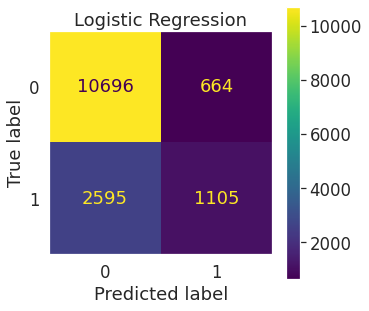

In [10]:
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)
prediction = clf_lr.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_lr, x_test, y_test, ax = ax, values_format='')
plt.title('Logistic Regression')
plt.grid(False)
plt.plot();

**Gaussian Naive Bayes**

Accuracy Score :  0.7885790172642763


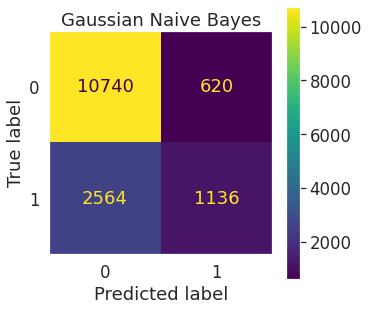

In [11]:
clf_g = GaussianNB()
clf_g.fit(x_train,y_train)
prediction = clf_g.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_g, x_test, y_test, ax = ax, values_format='')
plt.title('Gaussian Naive Bayes')
plt.grid(False)
plt.plot();

**Decision Tree Classifier**

Accuracy Score :  0.848207171314741


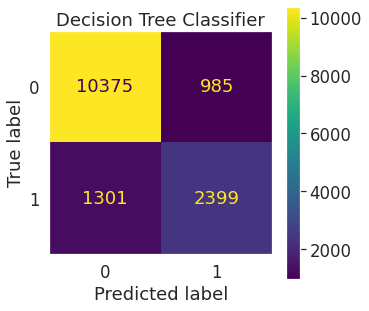

In [12]:
clf_dt = DecisionTreeClassifier(max_depth=10)
clf_dt.fit(x_train,y_train)
prediction = clf_dt.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_dt, x_test, y_test, ax = ax, values_format='')
plt.title('Decision Tree Classifier')
plt.grid(False)
plt.plot();

**Applying Grid Searching for Hyperparameters**

In [21]:
param_dt = [{'max_depth': [2, 4, 7, 8, 10, 12, 15, 20, 30, 50, 100] },{'max_leaf_nodes': [10, 20, 25, 30, 50, 70, 100, 150]}]

clf_dtG = DecisionTreeClassifier()
grid = GridSearchCV(clf_dtG, param_dt)
grid.fit(x_train,y_train)
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy Score :  0.849933598937583


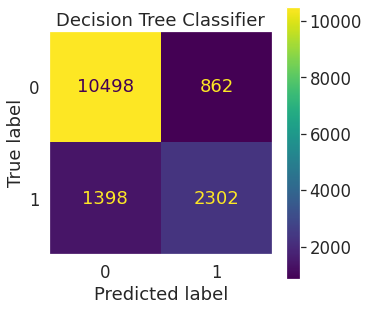

In [19]:
clf_DT = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 100)
clf_DT.fit(x_train,y_train)
prediction = clf_DT.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_DT, x_test, y_test, ax = ax, values_format='')
plt.title('Decision Tree Classifier')
plt.grid(False)
plt.plot();

**Support Vector Classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy Score :  0.7937583001328021


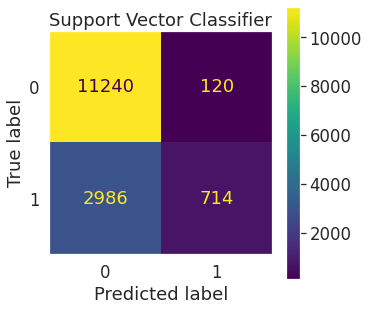

In [15]:
clf_LSVC = LinearSVC()
clf_LSVC.fit(x_train,y_train)
prediction = clf_LSVC.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_LSVC, x_test, y_test, ax = ax, values_format='')
plt.title('Support Vector Classifier')
plt.grid(False)
plt.plot();

**Applying Grid Searching for Hyperparameters**

In [22]:
param_grid = {'C': [1, 3, 10],'gamma' : [0.03, 0.1, 0.2],'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid)

grid.fit(x_train,y_train)

print(grid.best_params_)

{'C': 1, 'gamma': 0.03, 'kernel': 'rbf'}


Accuracy Score :  0.7551792828685259


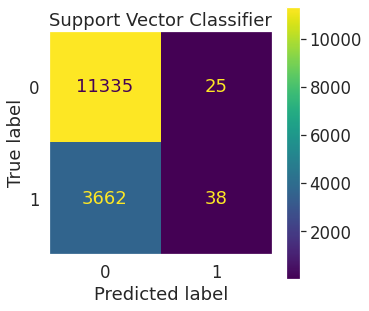

In [25]:
clf_SVC = SVC(C=1, gamma=0.03, kernel='rbf')
clf_SVC.fit(x_train,y_train)
prediction = clf_SVC.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_SVC, x_test, y_test, ax = ax, values_format='')
plt.title('Support Vector Classifier')
plt.grid(False)
plt.plot();

**KNN Classifier : Applying Grid Searching for Hyperparameters**

In [28]:
param_knn = [ {'n_neighbors': [5, 6, 7, 8, 9, 10, 12, 15, 20, 22, 25]}]
clf_K = KNeighborsClassifier()
grid =  GridSearchCV(clf_K, param_knn, cv = 4)
grid.fit(x_train,y_train)
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

Accuracy Score :  0.7942895086321381


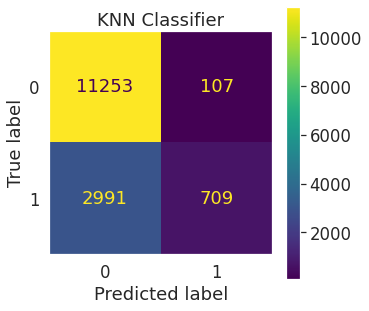

In [29]:
clf_knn = KNeighborsClassifier(n_neighbors=30)
clf_knn.fit(x_train,y_train)
prediction = clf_knn.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_knn, x_test, y_test, ax = ax, values_format='')
plt.title('KNN Classifier')
plt.grid(False)
plt.plot();

**Random Forest Classifier : Applying Grid Searching for Hyperparameters**

In [30]:
param_rf = [{'max_leaf_nodes': [25, 30, 50, 100, 150, 200, 250] },{'max_depth': [7, 9, 12, 15, 30]},{'n_estimators': [50, 100, 150, 200, 250, 300, 400]}]
clf_rf = RandomForestClassifier()
grid = GridSearchCV(clf_rf,param_rf, cv=5)
grid.fit(x_train,y_train)
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score :  0.8583001328021248


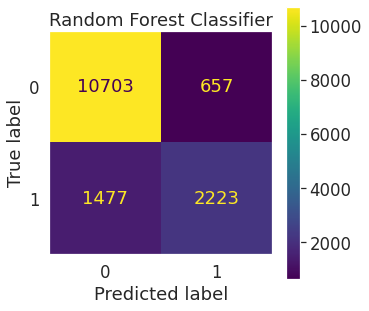

In [31]:
clf_rfc = RandomForestClassifier(max_depth=15, n_estimators= 100)
clf_rfc.fit(x_train,y_train)
prediction = clf_rfc.predict(x_test)

print("Accuracy Score : ",metrics.accuracy_score(y_test,prediction))
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
metrics.plot_confusion_matrix(clf_rfc, x_test, y_test, ax = ax, values_format='')
plt.title('Random Forest Classifier')
plt.grid(False)
plt.plot();